In [1]:
import numpy as np
import pickle

In [2]:
data = np.load("SHAcO_qp_rhoP1e-3_kIp5.pkl",allow_pickle=True)
data['SHAcO_qp'].keys()

dict_keys(['D', 'W2', 'W3', 'K', 'wfsMask', 'umin', 'umax', 'rm_mean_slopes', '_Tu', 'rho_3', 'end2end_ordering'])

In [3]:
def browse_dict(d,o):
    for key in d:
        print(f"{o}: <{key}>")
        if isinstance(d[key],dict):
            browse_dict(d[key],o+1)
        elif isinstance(d[key],np.ndarray):
            buf = d[key].copy()
            print(f" size: [{buf.shape}], type: {buf.dtype}")
            d[key] = buf.ravel().tolist()
        elif isinstance(d[key],list):
            n = len(d[key])
            print(f" size: [{n}].type: {type(d[key][0])}")
            for k in range(n):
                if isinstance(d[key][k],np.ndarray):
                    buf = d[key][k].copy()
                    print(f" #{k}. size: [{buf.shape}], type: {buf.dtype}")
                    d[key][k] = buf.ravel().tolist()
        else:
            print(f" type: {type(d[key])}")

In [4]:

if False:
    browse_dict(data,0)
    with open("SHAcO_qp_rhoP1e-3_kIp5.rs.pkl","wb") as f:
        pickle.dump(data,f)        
else:
    print(data['SHAcO_qp']['D'].shape,':',data['SHAcO_qp']['D'].dtype)
    print(data['SHAcO_qp']['_Tu'].dtype)

(7360, 271) : float64
float64


In [5]:
wfsdata = np.load("wfs48x48sample.pkl",allow_pickle=True)

wfsdt_dict = {'wfsdata':wfsdata}

if False:
    browse_dict(wfsdt_dict,0)
    with open("wfs48x48sample.rs.pkl","wb") as f:
        pickle.dump(wfsdt_dict,f)

print(wfsdata.shape,':',wfsdata.dtype)

(13824, 1) : float32


In [6]:
import os
current_path = os.getcwd()
os.chdir('/Users/rromano/Workspace/SIMCEO')
import sh_aco_qp_driver as AcO
os.chdir(current_path)

In [9]:
import logging
# AcO Object
AcO_QP = AcO.SHAcO_qp(
    data['SHAcO_qp']['D'],
    data['SHAcO_qp']['W2'],
    data['SHAcO_qp']['W3'],
    data['SHAcO_qp']['K'],
    data['SHAcO_qp']['wfsMask'],
    data['SHAcO_qp']['umin'],
    data['SHAcO_qp']['umax'],
    _Tu = data['SHAcO_qp']['_Tu'],rho3=data['SHAcO_qp']['rho_3'],
    rm_mean_slopes=False,end2end_ordering=True, verbose=logging.INFO)


INFO:SHAcO_qp: - - - Initializing AcO QP-based algorithm! - - - 
INFO:SHAcO_qp:AcO: k_I=0.5(integral gain) and rho3(0)=0.1


-----------------------------------------------------------------
           OSQP v0.6.2  -  Operator Splitting QP Solver
              (c) Bartolomeo Stellato,  Goran Banjac
        University of Oxford  -  Stanford University 2021
-----------------------------------------------------------------
problem:  variables n = 271, constraints m = 1228
          nnz(P) + nnz(A) = 67826
settings: linear system solver = qdldl,
          eps_abs = 1.0e-08, eps_rel = 1.0e-06,
          eps_prim_inf = 1.0e-04, eps_dual_inf = 1.0e-04,
          rho = 1.00e-01 (adaptive),
          sigma = 1.00e-06, alpha = 1.60, max_iter = 135500
          check_termination: on (interval 25),
          scaling: on, scaled_termination: off
          warm start: on, polish: off, time_limit: off



In [10]:
AcO_QP.init()
u = AcO_QP.output().ravel()
AcO_QP.update(wfsdata)


INFO:SHAcO_qp:1st-> J1:1.31e-09, J3:7.9e-10, ratio:16.6, ||s||:7.43e-08
INFO:SHAcO_qp:2nd> J1:1.32e-09, J3:6.98e-10, ratio:11.4, rho3:0.166
INFO:SHAcO_qp:c: [-1.33890042e-07  1.23621630e-08 -1.37545633e-07  1.36609185e-06
 -1.94730745e-06 -6.10401643e-07 -1.67310974e-07]


iter   objective    pri res    dua res    rho        time
   1  -2.6383e-08   1.16e-19   1.50e-03   1.00e-01   1.59e-02s
  75  -3.6471e-08   9.50e-19   1.79e-11   1.00e-06   4.21e-02s

status:               solved
number of iterations: 75
optimal objective:    -0.0000
run time:             4.33e-02s
optimal rho estimate: 1.00e-06

iter   objective    pri res    dua res    rho        time
   1  -3.6446e-08   2.07e-07   1.32e-06   1.00e-06   1.03e-02s
  25  -3.6447e-08   9.82e-13   5.95e-12   1.00e-06   1.47e-02s

status:               solved
number of iterations: 25
optimal objective:    -0.0000
run time:             1.63e-02s
optimal rho estimate: 1.00e-06



## Plot debug data

In [10]:
import matplotlib.pyplot as plt

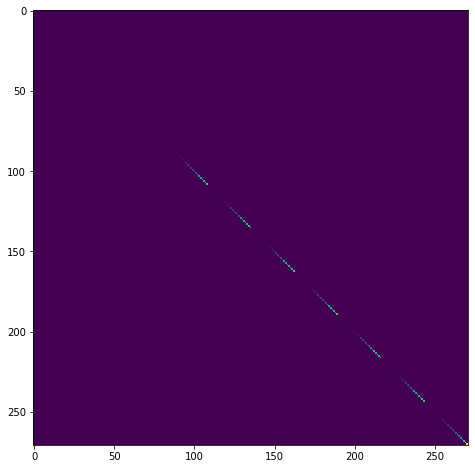

In [14]:
plt.figure(figsize=(16,8))
plt.imshow(data['SHAcO_qp']['W3'])

In [18]:
int(1228*271 + ((271*271 -271)/2 +271))

369644

In [24]:
1228*271

332788